# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("/Users/juliettegoardon/Desktop/Fraud.csv")

In [7]:
sample_data = data.sample(n=100000, random_state=42)

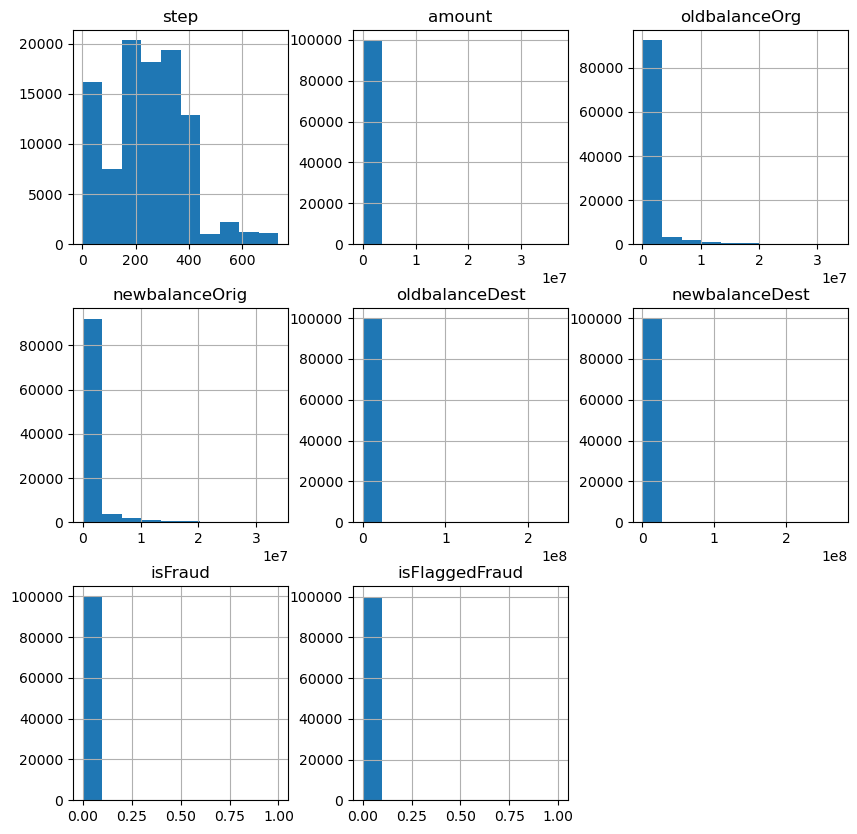

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_data.hist(figsize=(10, 10))
plt.show()

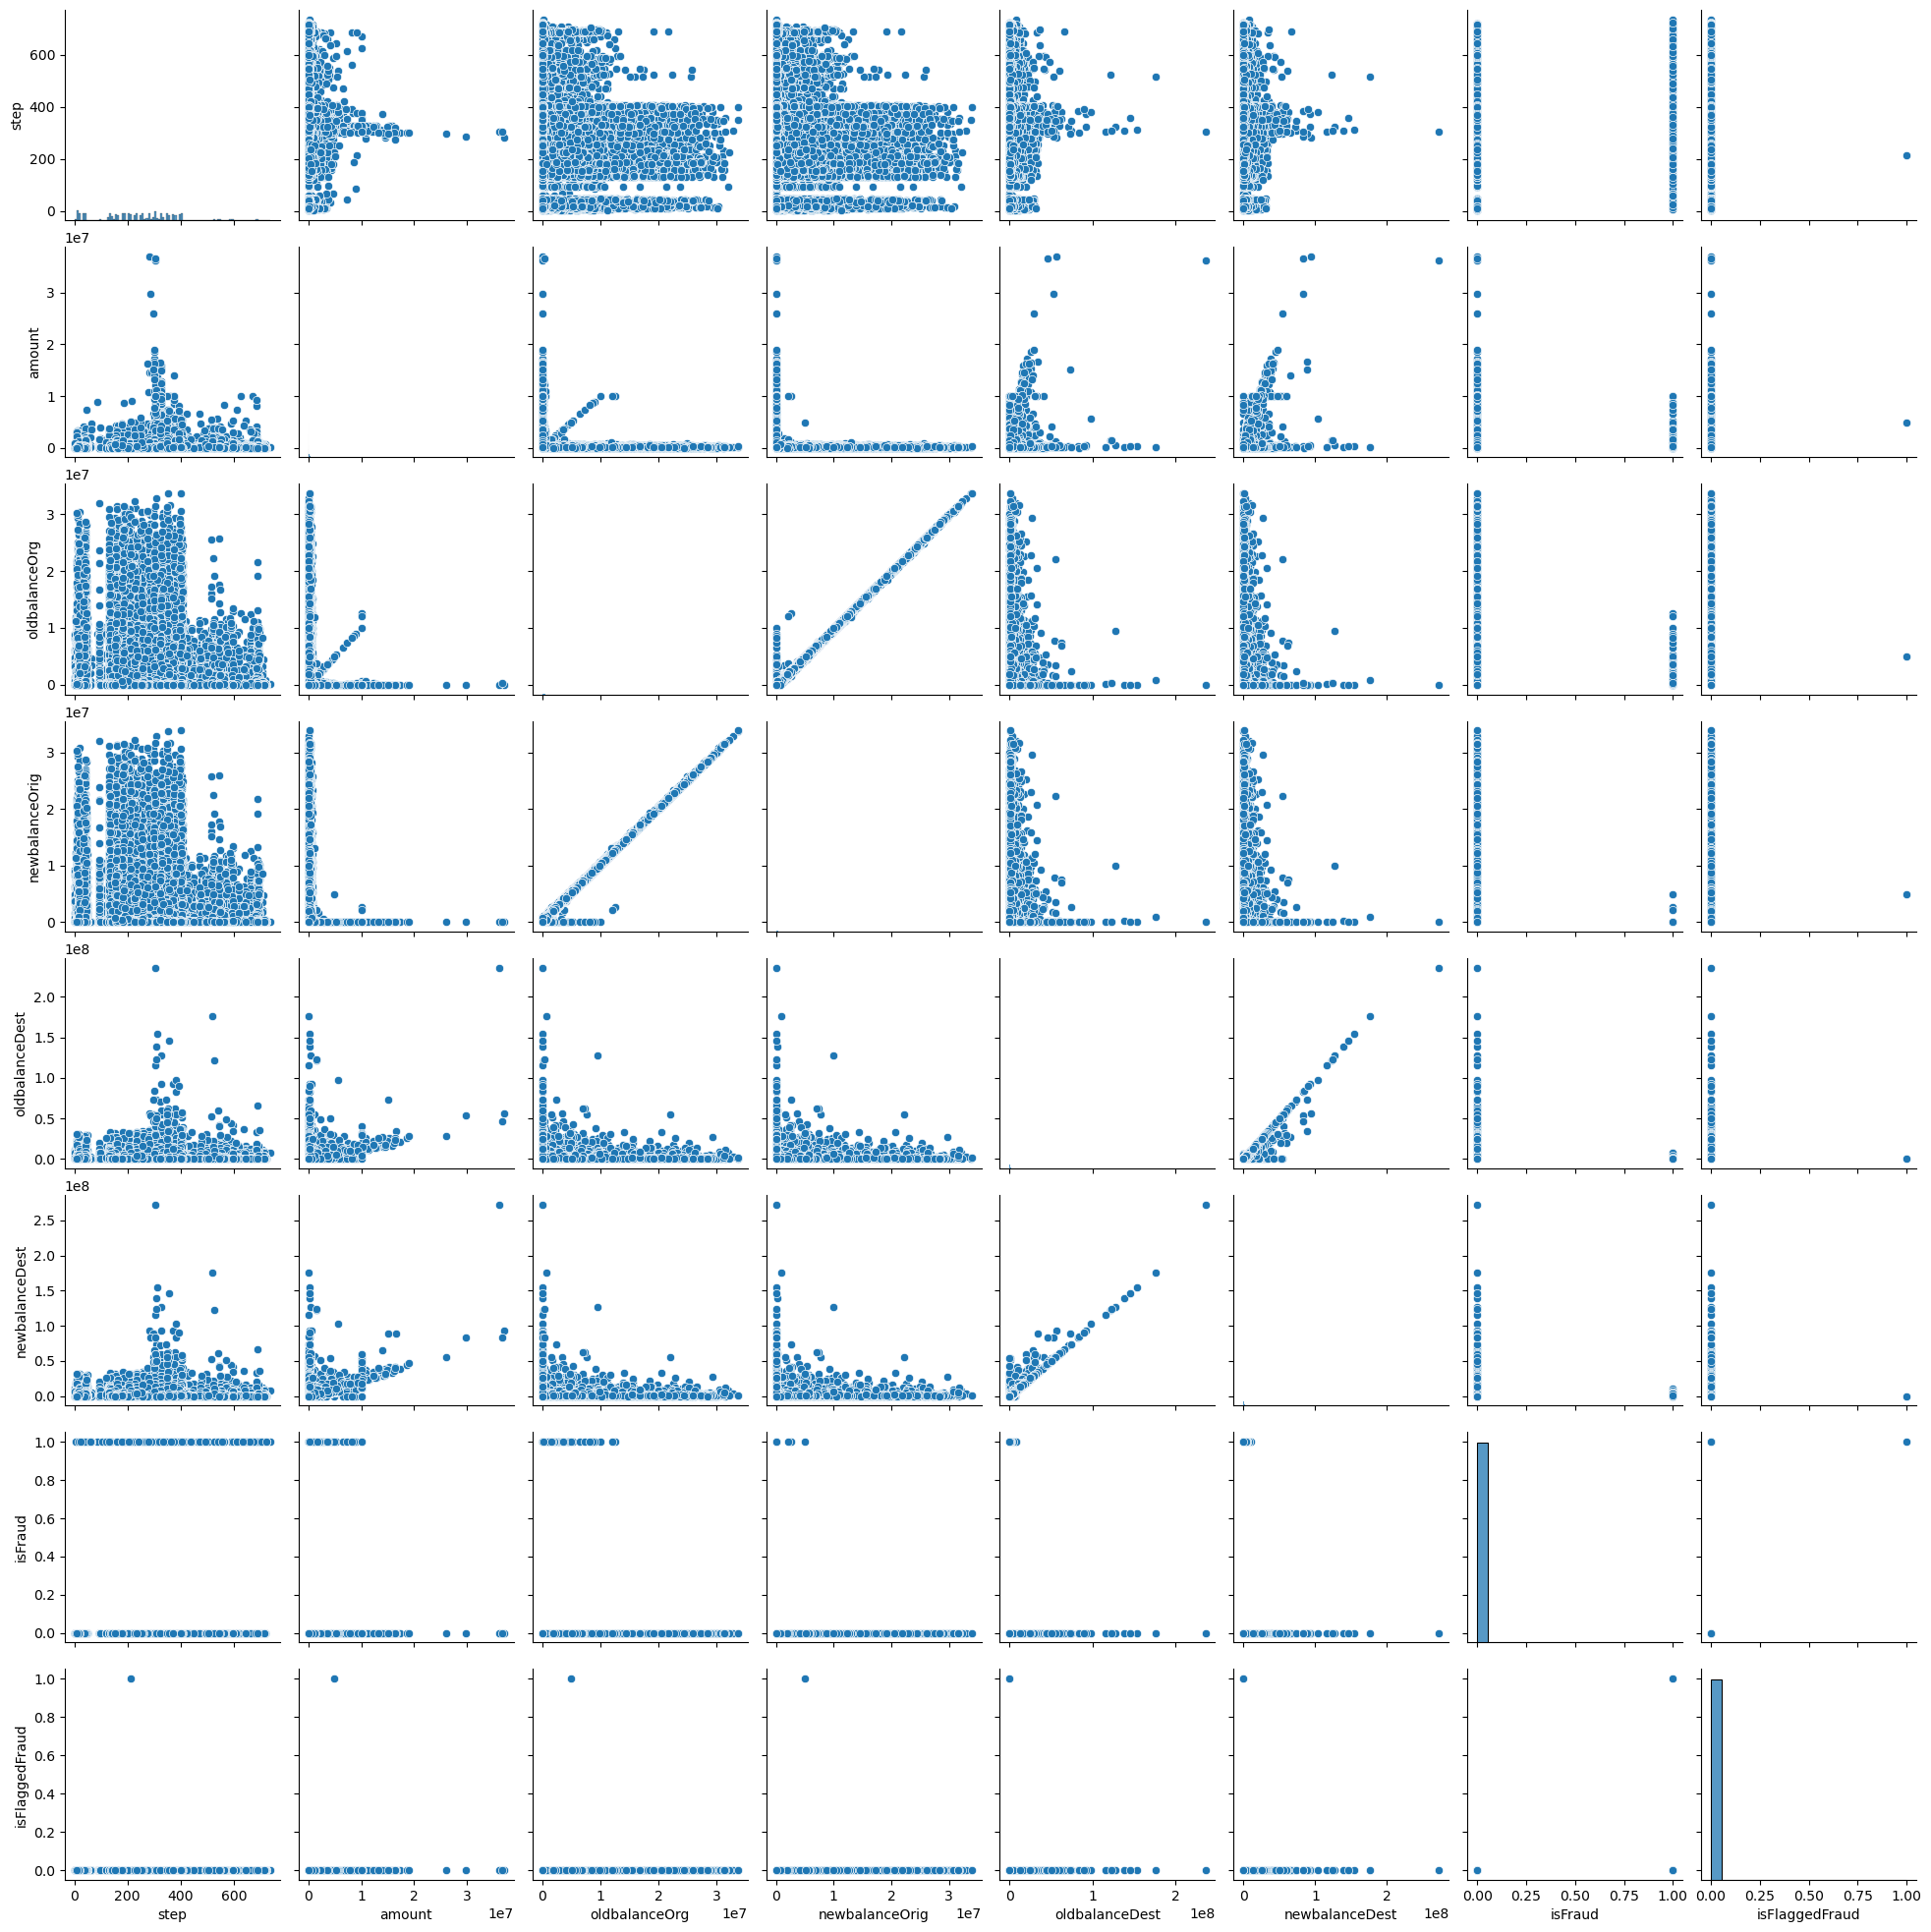

In [11]:
sns.pairplot(sample_data)
plt.show()

/var/folders/4w/gkpbc43d7px13jlqf4bcrptr0000gn/T/ipykernel_1522/4250768713.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sample_data.corr()


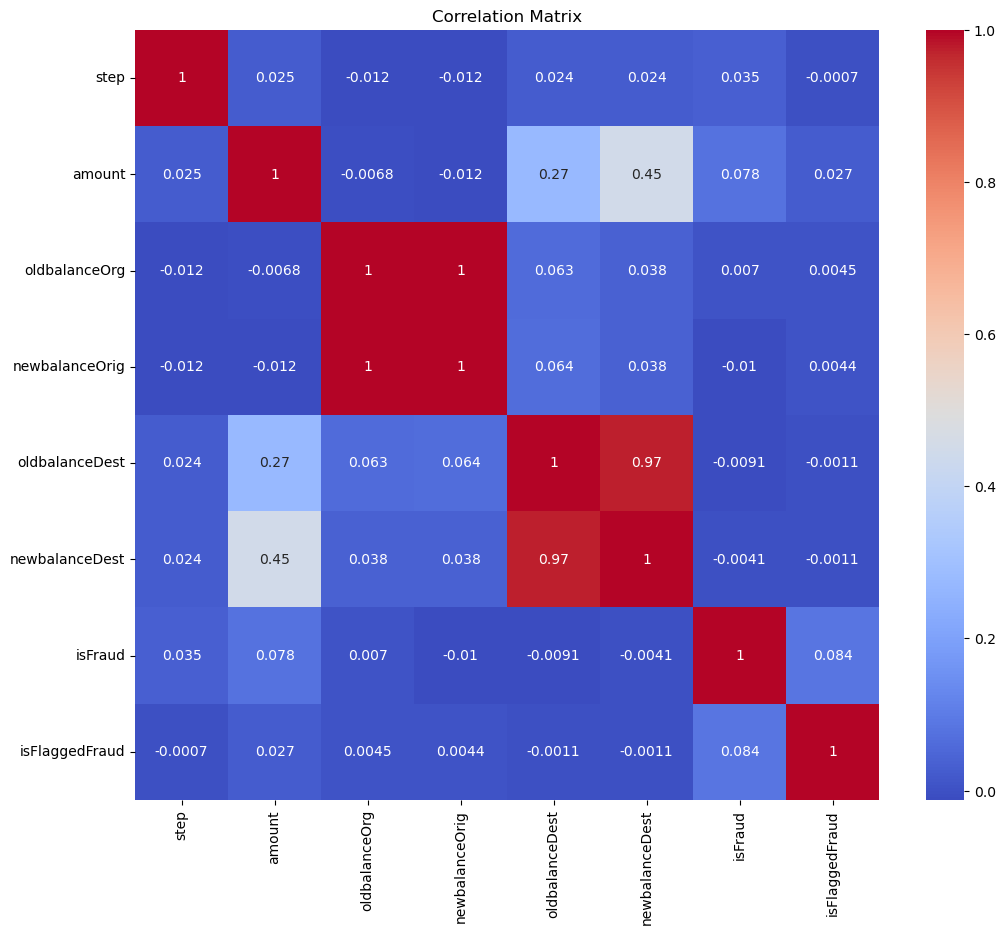

In [12]:
correlation_matrix = sample_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
print(sample_data.describe())

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  100000.000000  1.000000e+05   1.000000e+05    1.000000e+05   
mean      243.709070  1.805811e+05   8.366804e+05    8.582234e+05   
std       142.518613  5.586699e+05   2.901104e+06    2.936799e+06   
min         1.000000  9.200000e-01   0.000000e+00    0.000000e+00   
25%       156.000000  1.350821e+04   0.000000e+00    0.000000e+00   
50%       240.000000  7.603086e+04   1.393850e+04    0.000000e+00   
75%       335.000000  2.091130e+05   1.070771e+05    1.464169e+05   
max       736.000000  3.697390e+07   3.359321e+07    3.388709e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    1.000000e+05    1.000000e+05  100000.000000   100000.000000  
mean     1.104193e+06    1.230055e+06       0.001410        0.000010  
std      3.223011e+06    3.475326e+06       0.037524        0.003162  
min      0.000000e+00    0.000000e+00       0.000000        0.000000  
25%      0.000000e+00  

### What is the distribution of the outcome? 

In [19]:
# Your response here
sample_data['isFraud'].value_counts()

#The vast majority of the data isn't fraudulent. 


0    99859
1      141
Name: isFraud, dtype: int64

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [20]:
# Your code here
sample_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

sample_data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
# Those columns don't seem relevant to our analysis. 

# Take care of categorical data 
label_encoder = LabelEncoder()
sample_data['type'] = label_encoder.fit_transform(sample_data['type'])

# Split features and target variable
X = sample_data.drop('isFraud', axis=1)
y = sample_data['isFraud']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
sample_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,0,330218.42,20866.00,351084.42,452419.57,122201.15,0,0
264914,15,3,11647.08,30370.00,18722.92,0.00,0.00,0,0
85647,10,0,152264.21,106589.00,258853.21,201303.01,49038.80,0,0
5899326,403,4,1551760.63,0.00,0.00,3198359.45,4750120.08,0,0
2544263,206,0,78172.30,2921331.58,2999503.88,415821.90,337649.60,0,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.99895


### Now pick a model of your choice and evaluate its accuracy.

In [25]:
# Your code here

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)


Random Forest Classifier Accuracy: 0.99965


### Which model worked better and how do you know?

In [2]:
# Your response here
# The random forest classifier worked better since it has a slightly higher accuracy score. 

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.